### 3. Model Training

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Load training data

In [3]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

#### Random Forest Model

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [5]:
# Random Forest
rf = RandomForestClassifier()
# fit RF to training set
rf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
# prediction for test set
y_pred = rf.predict(X_test)

In [7]:
# metrics
print("accuracy: ", accuracy_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))

accuracy:  0.7761194029850746
precision:  0.6534653465346535
recall:  0.4852941176470588


In [8]:
print("confusion_metrics")
confusion_matrix(y_test, y_pred)

confusion_metrics


array([[894, 105],
       [210, 198]])

#### Save Random Forest model binary

In [9]:
import joblib
joblib.dump(rf, "rf_model.pkl")

['rf_model.pkl']

#### Model explainability

In [9]:
#!pip install shap

In [10]:
import shap

#### Explainable AI
SHAP value: 

- Positive SHAP value means positive impact on prediction, leading the model to predict 1 (e.g. Customer churn)
- Negative SHAP value means negative impact, leading the model to predict 0 (e.g. Customer retain).
- Red color indicates features that are pushing the prediction higher, and blue color indicates just the opposite.

In [11]:
explainer = shap.Explainer(rf)
shap_values_multiple = explainer(X)

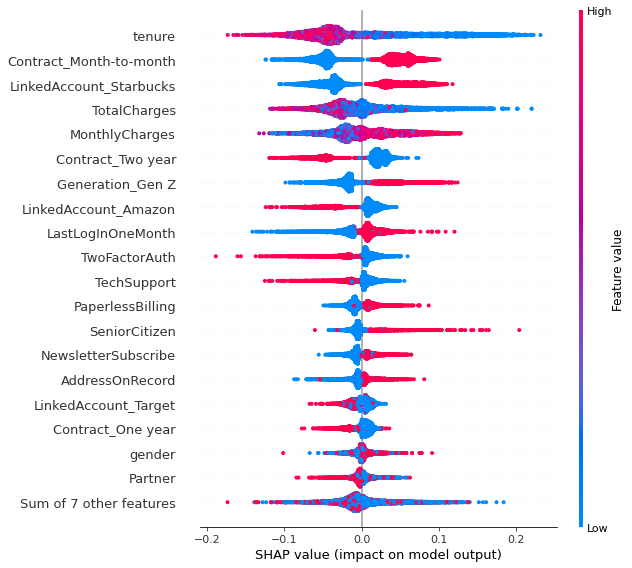

In [12]:
shap.plots.beeswarm(shap_values_multiple[:,:,-1], max_display=20)

**Model insights**: 
- customers under month-to-month contract --> high chance to churn
- customers have linked account with Starbucks --> high chance to churn
- customers who are Gen Z --> high chance to churn
- not provided enough Starbuck rewards

**Business actions**: 
- form strategy to convert month-to-month contract to yearly subscription
- form strategy to work with Starbuck to provide more rewards